In [5]:
import math
from scipy.special import gamma, digamma

constEuler = 0.57721566490153286060651209008240243

def fat(n):
    total = 1
    for i in range(n):
        total *= (i + 1)
    return total
        
def porcZipf(n, rank=1):
    if n > 0:
        total = 0
        for j in range(1, n+1):
            total += 1/j
        return 1/(total*rank)
    else:
        print("Calculo impossivel")

# A aproximacao parece ruim
for i in range(1, 171):
    aprox = 1
    if i!=1:
        aprox = 100/(constEuler*math.log(i))
    print("Quantidade de elementos {:5d} - porcentagem: {:2.2f}% - aproximacao: {:.2f}%".format(i, 100 * porcZipf(i, 1), aprox))

Quantidade de elementos     1 - porcentagem: 100.00% - aproximacao: 1.00%
Quantidade de elementos     2 - porcentagem: 66.67% - aproximacao: 249.94%
Quantidade de elementos     3 - porcentagem: 54.55% - aproximacao: 157.69%
Quantidade de elementos     4 - porcentagem: 48.00% - aproximacao: 124.97%
Quantidade de elementos     5 - porcentagem: 43.80% - aproximacao: 107.64%
Quantidade de elementos     6 - porcentagem: 40.82% - aproximacao: 96.69%
Quantidade de elementos     7 - porcentagem: 38.57% - aproximacao: 89.03%
Quantidade de elementos     8 - porcentagem: 36.79% - aproximacao: 83.31%
Quantidade de elementos     9 - porcentagem: 35.35% - aproximacao: 78.85%
Quantidade de elementos    10 - porcentagem: 34.14% - aproximacao: 75.24%
Quantidade de elementos    11 - porcentagem: 33.11% - aproximacao: 72.25%
Quantidade de elementos    12 - porcentagem: 32.22% - aproximacao: 69.72%
Quantidade de elementos    13 - porcentagem: 31.45% - aproximacao: 67.54%
Quantidade de elementos    14 - po

In [2]:
import numpy as np

# arredondar para cima
from math import ceil

def porcZipf(n, rank=1):
    if n > 0:
        total = 0
        for j in range(1, n+1):
            total += 1/j
        return 1/(total*rank)
    else:
        print("Calculo impossivel")

def receberDict(x=1):
    if x==1:
        x=input("Arquivo a ser lido: ")
    leitor = open("{}".format(x), "r", encoding="utf-8")
    texto = leitor.read()
    for letra in "(),":
        texto = texto.replace(letra, " ")
    texto = texto.split()

    dict = {}
    for i in range(0, len(texto), 2):
        chave = texto[i].strip("'")
        valor = int(texto[i + 1])
        dict[chave] = valor
    return dict

dicionario = receberDict("resultados/saida-alice.txt")
listaValores = list(dicionario.values())
listaChaves = list(dicionario.keys())

totalDePalavras = ceil(sum(listaValores))

for i in range(1, 20):
    print("Valor esperado: {:.0f}".format(ceil(porcZipf(totalDePalavras, i)*totalDePalavras)))
    print("Valor real: ", listaValores[i-1], "\n")

Valor esperado: 2735
Valor real:  1828 

Valor esperado: 1368
Valor real:  918 

Valor esperado: 912
Valor real:  806 

Valor esperado: 684
Valor real:  690 

Valor esperado: 547
Valor real:  634 

Valor esperado: 456
Valor real:  538 

Valor esperado: 391
Valor real:  538 

Valor esperado: 342
Valor real:  459 

Valor esperado: 304
Valor real:  434 

Valor esperado: 274
Valor real:  433 

Valor esperado: 249
Valor real:  395 

Valor esperado: 228
Valor real:  390 

Valor esperado: 211
Valor real:  359 

Valor esperado: 196
Valor real:  292 

Valor esperado: 183
Valor real:  271 

Valor esperado: 171
Valor real:  248 

Valor esperado: 161
Valor real:  227 

Valor esperado: 152
Valor real:  222 

Valor esperado: 144
Valor real:  204 



In [6]:
#Isso o chat gpt fez baseado em algumas citações sobre a lei de zipf eu ainda estou tentando entender como funciona
from scipy.stats import kstest, expon
import numpy as np

def test_zipf_law(word_counts):
    # Sorting words by frequency
    sorted_words = sorted(word_counts, key=word_counts.get, reverse=True)

    # Calculating the frequencies
    frequencies = [word_counts[word] for word in sorted_words]

    # Expected frequencies according to Zipf's law
    expected_frequencies = [frequencies[0] / (i + 1) for i in range(len(frequencies))]

    # Performing the Kolmogorov-Smirnov test with exponential distribution
    ks_statistic, ks_p_value = kstest(frequencies, expon.cdf, args=(0, np.mean(frequencies)))

    # Outputting the results
    print(f"Kolmogorov-Smirnov Statistic: {ks_statistic}")
    print(f"P-Value: {ks_p_value}")

    if ks_p_value < 0.05:
        print("The data does not follow Zipf's law.")
    else:
        print("The data follows Zipf's law.")

# Exemplo de uso
#word_counts = receberDict("resultados/saida-casmurro.txt")
word_counts = {"apple": 10, "banana": 5, "orange": 3, "grape": 2, "pear": 1}
test_zipf_law(word_counts)

Kolmogorov-Smirnov Statistic: 0.211872372254689
P-Value: 0.9410533364360948
The data follows Zipf's law.


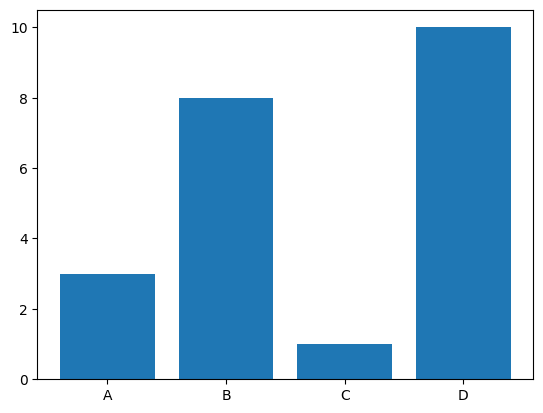

In [1]:
#grafico de barras
import matplotlib.pyplot as plt

x = ["A", "B", "C", "D"]
y = [3, 8, 1, 10]

plt.bar(x,y)
plt.show()

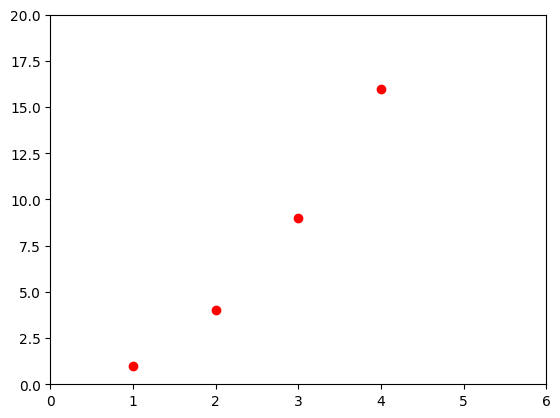

In [2]:
#exemplo de grafico de pontos
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()